In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer


# metrics.confusion_matrix()

# Diabetes Data

## Setup

In [69]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)
dataset.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [70]:
x_df = dataset.copy()
x_df.pop('Outcome')
x_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [71]:
y_df = dataset.loc[:,'Outcome']
y_df.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [72]:
x_true = x_df.values
y_true = y_df.values

In [73]:
x_true.shape

(768, 8)

In [74]:
y_true.shape

(768,)

## Problem 1

### Part 1

In [75]:
x = x_true.copy()
y = y_true.copy()

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state=1)

In [76]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
x_train.shape

(614, 8)

In [78]:
x_test.shape

(154, 8)

In [79]:
classifier_model = LogisticRegression();
classifier_model.fit(x_train, y_train);

In [80]:
y_pred = classifier_model.predict(x_test)
y_pred.shape

(154,)

In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[89, 10],
       [24, 31]], dtype=int64)

In [82]:
print(f"Accuracy: %.3f%%" % (100 * metrics.accuracy_score(y_test, y_pred)));
print(f"Precision: %.3f%%" % (100 * metrics.precision_score(y_test, y_pred)));
print("Recall: %.3f%%" % (100 * metrics.recall_score(y_test, y_pred)));

Accuracy: 77.922%
Precision: 75.610%
Recall: 56.364%


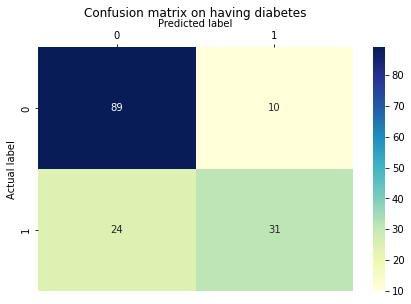

In [83]:
class_names=["false","true"] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title('Confusion matrix on having diabetes', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [84]:
del x_test, x_train, y_test, y_train, x, y, y_pred, classifier_model, cnf_matrix, REGULARIZATION_VALUE, scaler

## Problem 2

### Part 1
k fold.
k = 5.


In [85]:
NUMBER_SPLITS=5

In [86]:
x = x_true.copy()
y = y_true.copy()
# print(x)

In [87]:
# Scale data        was testing data scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [88]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression()
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 77.213% (2.057%)


In [89]:
for item in [x, y, classifier_model, kfold, NUMBER_SPLITS, scaler]:
    del item

### Part 2
k fold.
k = 10.

In [90]:
NUMBER_SPLITS=10

In [91]:
x = x_true.copy()
y = y_true.copy()

In [92]:
# Scale data        was testing data scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [93]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression()
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 77.085% (3.455%)


In [94]:
del x, y, classifier_model, kfold, NUMBER_SPLITS, scaler

In [95]:
# if 'kfold' in locals():
#     print(kfold)
# else:
#     print("DNE")

# Cancer Data

## Setup

In [96]:
# print(locals().keys())

In [97]:
dataset = load_breast_cancer()

In [98]:
breast_data = dataset.data
breast_data.shape

(569, 30)

In [99]:
breast_labels = dataset.target
breast_labels = np.reshape(breast_labels,(len(breast_labels),1))
breast_labels.shape

(569, 1)

In [100]:
final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
final_breast_data.shape

(569, 31)

In [101]:
breast_df = pd.DataFrame(final_breast_data)
breast_df.columns = np.append(dataset.feature_names, 'label')
print(f'Shape: {breast_df.shape}')
breast_df.head(25) # print 25 to see two labels

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0.0


In [102]:
def remap_labels(data_series):
    data_series.replace(0, 'Benign',inplace=True)
    data_series.replace(1, 'Malignant',inplace=True)

In [103]:
remap_labels(breast_df['label'])

In [104]:
breast_df.tail(9) # Showing tail to test remap quicker

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321,Malignant
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905,Malignant
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,Benign
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873,Benign
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [105]:
x_true = (breast_df.copy())
y_true = x_true.pop('label')
x_true = x_true.values
y_true = y_true.values
print(x_true.shape)
print(y_true.shape)

(569, 30)
(569,)


## Problem 3

### Setup

In [106]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_true.copy(), y_true.copy(), test_size = 0.2, random_state=1)

In [107]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [108]:
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


In [109]:
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


### Part 1

In [110]:
# Using lbfgs as it can do no paramater penalty it defaults to l2 
classifier_model = LogisticRegression(penalty = 'none', max_iter=250)

In [111]:
classifier_model.fit(x_train, y_train);

In [112]:
y_pred = classifier_model.predict(x_test)
y_pred.shape

(114,)

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[41,  1],
       [ 2, 70]], dtype=int64)

In [114]:
title = 'Confusion matrix without paramater penatly'
# # The commented out version was when it didnt remap the starting data at the data frame.
# # The values where the same as above
# print(f"Accuracy: %.3f%%" % (100 * metrics.accuracy_score(y_test, y_pred)));
# print(f"Precision: %.3f%%" % (100 * metrics.precision_score(y_test, y_pred)));
# print("Recall: %.3f%%" % (100 * metrics.recall_score(y_test, y_pred)));

print(title, "\n")
print(f"Accuracy: %.3f%%" % (100 * metrics.accuracy_score(y_test, y_pred)));
print(f"Precision: %.3f%%" % (100 * metrics.precision_score(y_test, y_pred, pos_label="Malignant")));
print("Recall: %.3f%%" % (100 * metrics.recall_score(y_test, y_pred, pos_label="Malignant")));

Confusion matrix without paramater penatly 

Accuracy: 97.368%
Precision: 98.592%
Recall: 97.222%


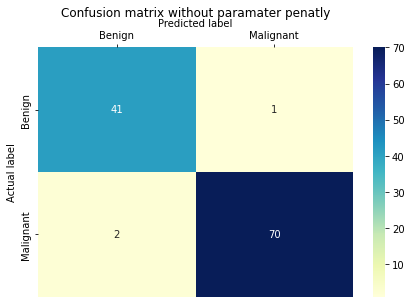

In [115]:
class_names=['Benign','Malignant'] # name of classes
fig, ax = plt.subplots()
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
# tick_marks = np.arange(len(class_names)) + 0.5 # removed for a cleaner method
cnf_df = pd.DataFrame(cnf_matrix)
# create heatmap
sns.heatmap(cnf_df, annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
fig.tight_layout()
# plt.xticks(tick_marks, class_names);# removed for a cleaner method
# plt.yticks(tick_marks, class_names);# removed for a cleaner method
plt.title(title, y=1.1);
plt.ylabel('Actual label', );
plt.xlabel('Predicted label');

In [116]:
del cnf_matrix, y_pred, classifier_model, title

### Part 2

In [117]:
REGULARIZATION_VALUE = 0.1
# Using lbfgs as it defaults paramater penalty to l2 
classifier_model = LogisticRegression(max_iter=250, C=REGULARIZATION_VALUE)

In [118]:
classifier_model.fit(x_train, y_train);

In [119]:
y_pred = classifier_model.predict(x_test)
y_pred.shape

(114,)

In [120]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[39,  3],
       [ 0, 72]], dtype=int64)

In [121]:
title = 'Confusion matrix with paramater penatly'
# # The commented out version was when it didnt remap the starting data at the data frame.
# # The values where the same as above
# print(f"Accuracy: %.3f%%" % (100 * metrics.accuracy_score(y_test, y_pred)));
# print(f"Precision: %.3f%%" % (100 * metrics.precision_score(y_test, y_pred)));
# print("Recall: %.3f%%" % (100 * metrics.recall_score(y_test, y_pred)));

print(title, "\n")
print(f"Accuracy: %.3f%%" % (100 * metrics.accuracy_score(y_test, y_pred)));
print(f"Precision: %.3f%%" % (100 * metrics.precision_score(y_test, y_pred, pos_label="Malignant")));
print("Recall: %.3f%%" % (100 * metrics.recall_score(y_test, y_pred, pos_label="Malignant")));

Confusion matrix with paramater penatly 

Accuracy: 97.368%
Precision: 96.000%
Recall: 100.000%


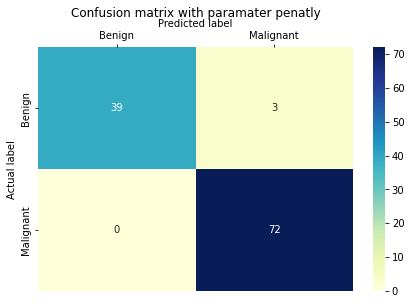

In [122]:
class_names=['Benign','Malignant'] # name of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title(title, y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [123]:
del cnf_matrix, y_pred, classifier_model

### cleanup

In [124]:
del title, x_train, x_test, y_train, y_test, scaler

## Problem 4

### Setup

### Part 1


#### k = 5
use K-fold cross-validation with k = 5 and no weight penalty

In [125]:
NUMBER_SPLITS=5
x = x_true.copy()
y = y_true.copy()
# print(x)

In [126]:
x = StandardScaler().fit_transform(x)
# print(x)

In [127]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression(penalty = 'none', max_iter=250)
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 95.602% (1.939%)


#### k = 10
use K-fold cross-validation with k = 10 and no weight penalty

In [128]:
NUMBER_SPLITS=10
x = x_true.copy()
y = y_true.copy()

In [129]:
x = StandardScaler().fit_transform(x)

In [130]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression(penalty = 'none', max_iter=1000)
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 95.072% (2.936%)


### Part 2
use K-fold cross-validation with weight penalty. 

#### k = 5

In [131]:
NUMBER_SPLITS=5
x = x_true.copy()
y = y_true.copy()
x = StandardScaler().fit_transform(x)

In [132]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression(max_iter=250)
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 98.064% (1.297%)


#### k = 10

In [133]:
NUMBER_SPLITS=10
x = x_true.copy()
y = y_true.copy()
x = StandardScaler().fit_transform(x)

In [134]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression(max_iter=250)
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 97.879% (2.619%)
